In [2]:
import numpy as np
import yaml
from yaml.loader import SafeLoader
import argparse
import logging
import os
from datetime import datetime
import sys
import pathlib
import albumentations as A
import cv2
from data.dataset_module import DataModule
% matplotlib inline
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

UsageError: Line magic function `%` not found.


In [3]:

from matplotlib import pyplot as plt


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    BOX_COLOR = (255, 0, 0)  # Red
    TEXT_COLOR = (255, 255, 255)  # White

    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [4]:
def load_config():
    with open("/home/psrahul/MasterThesis/repo/Phase3/CLIPandDetect/config.yaml", "r") as f:
        config = yaml.load(f, Loader=SafeLoader)

    return config


cfg = load_config()
coco_dataset = DataModule(cfg)


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


In [5]:
transform = A.Compose([
    A.RandomCrop(width=324, height=324),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='coco', min_area=1600, min_visibility=0.1, label_fields=['class_labels']))

In [6]:
image = coco_dataset.train_dataset._load_image(5)
anns = coco_dataset.train_dataset._load_target(5)
image = np.array(image)


In [7]:
bounding_box_list = []
class_list = []
for ann in anns:
    bounding_box_list.append(ann['bbox'])
    class_list.append(ann['category_id'])

In [8]:
transformed = transform(image=image, bboxes=bounding_box_list, class_labels=class_list)
transformed_image = transformed['image']
transformed_bounding_box_list = transformed['bboxes']
transformed_class_list = transformed['class_labels']
category_id_to_name = {11: 'cat', 16: 'dog'}


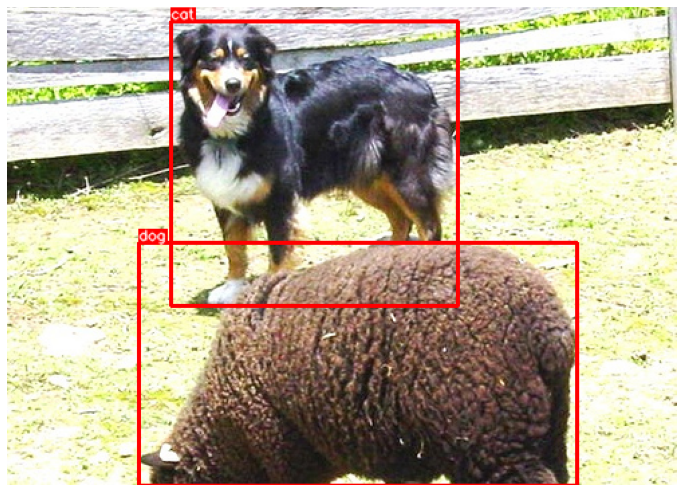

In [9]:
visualize(image, bounding_box_list, class_list, category_id_to_name)


(324, 324, 3)


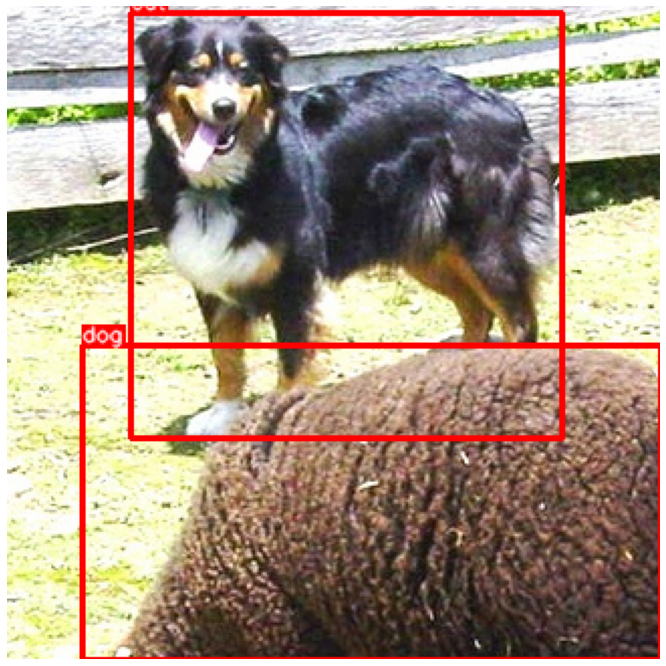

In [10]:
visualize(transformed_image, transformed_bounding_box_list, transformed_class_list, category_id_to_name)
print(transformed_image.shape)


In [11]:
mask_transform = A.Compose([
    A.Resize(96, 96),
], bbox_params=A.BboxParams(format='coco', min_area=1600, min_visibility=0.1, label_fields=['class_labels']))

In [12]:
mask_transformed = mask_transform(image=transformed_image, bboxes=transformed_bounding_box_list,
                                  class_labels=transformed_class_list)
mask_transformed_image = mask_transformed['image']
mask_transformed_bounding_box_list = mask_transformed['bboxes']
mask_transformed_class_list = mask_transformed['class_labels']
category_id_to_name = {11: 'cat', 16: 'dog'}


(96, 96, 3)


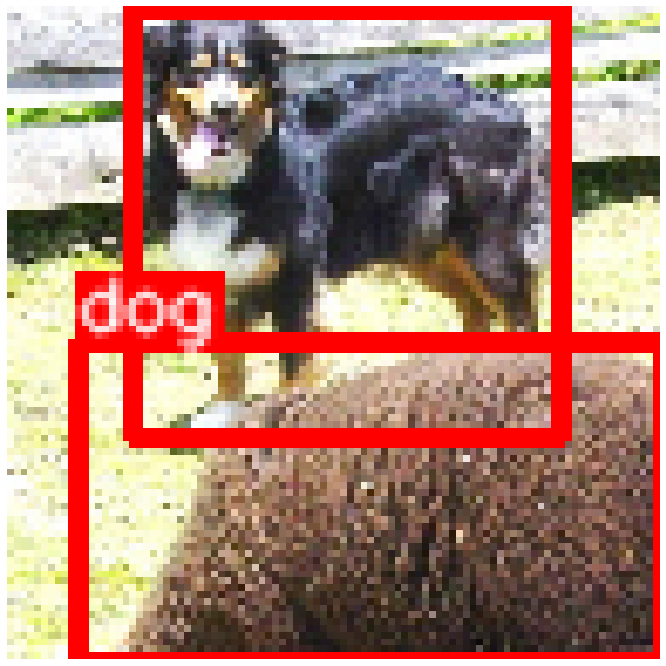

In [13]:
visualize(mask_transformed_image, mask_transformed_bounding_box_list, mask_transformed_class_list, category_id_to_name)
print(mask_transformed_image.shape)
